**Assignment 05**

Reinforcement Learning

**Name**:Abhishek Patel

**Enrollment No**: 23565001

**Dept**: MFS-AI

**email**: abhishek_p@mfs.iitr.ac.in

#Question 01

  **Assignment 4.** *Consider the RL problem corresponding to the MDP planning of robot movement. Do you think this RL problem can be solved using Model based approach? Why or why not? (2 point).*

No, the RL problem corresponding to the MDP plannign of robot movement in assignment 4 cannot be solved using model-based approach.

This is due to the reason that in model-based approach, there is a primary requirement for the algorithm to be **irreducible** to ensure convergence towards optimality.

**Irreducibility**: For a given MDP, M = (S,A,T,R,γ) and any policy π ∈ Π, if there is a non-zero probability of transition from any state to s, to any other state s', then the MDP is said to be irreducible under that policy π. And if MDP is irreducible under all policies π ∈ Π, then the MDP is said to be irreducible.

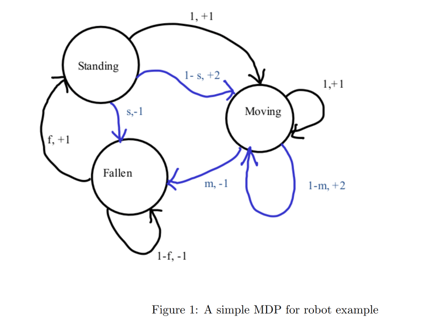




In our MDP (as shown in fig above), for slow actions (black), there is no directed path from standing/moving state to fallen state. Also, there is no directed path from moving state to standing state.
Siniliarly, for fast actions (Blue) there is no directed path from moving/fallen state to standing state or from fallen state to moving state.
Hence, M is not irreducible and cannot be solved using model based approach.


#Question 02

*Construct an environment (MDP planning problem with three states and two actions) and the corresponding RL framework which can be solved using model-based algorithm. Implement the model-based algorithm and present your insights (8 points).*

###Reward and Transition matrix

In [ ]:
import numpy as np
from tqdm import tqdm


P=np.zeros((3,2,3))
R=np.zeros((3,2,3))

# Transition matrix
P[0,0,0]=0.4
P[0,0,1]=0.4
P[0,0,2]=0.2
P[0,1,0]=0.25
P[0,1,1]=0.25
P[0,1,2]=0.5

P[1,0,0]=0.4
P[1,0,1]=0.3
P[1,0,2]=0.3
P[1,1,0]=0.2
P[1,1,1]=0.4
P[1,1,2]=0.4

P[2,0,0]=0.4
P[2,0,1]=0.4
P[2,0,2]=0.2
P[2,1,0]=0.3
P[2,1,1]=0.3
P[2,1,2]=0.4


# Reward Matrix
R[0,0,0]=5
R[0,0,1]=1
R[0,0,2]=1
R[0,1,0]=1
R[0,1,1]=-1
R[0,1,2]=3

R[1,0,0]=2
R[1,0,1]=1
R[1,0,2]=3
R[1,1,0]=1
R[1,1,1]=-4
R[1,1,2]=6

R[2,0,0]=4
R[2,0,1]=-6
R[2,0,2]=1
R[2,1,0]=3
R[2,1,1]=1
R[2,1,2]=7

gamma=0.9

print("Reward Matrix: ")
print(R)

print("\nTransition Matrix: ")
print(P)

Reward Matrix: 
[[[ 5.  1.  1.]
  [ 1. -1.  3.]]

 [[ 2.  1.  3.]
  [ 1. -4.  6.]]

 [[ 4. -6.  1.]
  [ 3.  1.  7.]]]

Transition Matrix: 
[[[0.4  0.4  0.2 ]
  [0.25 0.25 0.5 ]]

 [[0.4  0.3  0.3 ]
  [0.2  0.4  0.4 ]]

 [[0.4  0.4  0.2 ]
  [0.3  0.3  0.4 ]]]


###Value Function decleration

In [ ]:
def calculate_Value(P,R,gamma):
  V = np.zeros(3)  # Initial value function
  theta = 1e-6  # Threshold for convergence  # Difference between old and new values (initialize to ensure at least one iteration)

  while True:
      delta = 0
      v = V.copy()
      for state in range(3):
          # Save the current value of the state
          V[state] = max(sum(P[state, action, next_state] * (R[state, action, next_state] + gamma * V[next_state])
                            for next_state in range(3)) for action in range(2))
      delta = max([abs(v[state] - V[state]) for state in range(3)])
      if delta <theta:
        break
  return np.around(V,4)

calculate_Value(P,R,gamma)

array([27.6924, 27.2866, 29.4443])

###**Q** value function decleration

In [ ]:
def calculate_Q_value(V_,P_,R_,gamma):
  Q = np.zeros((3, 2))  # Initial action-value function


  # Calculate Q* using the optimal value function V*
  for state in range(3):
      for action in range(2):
          Q[state, action] = sum(P_[state, action, next_state] * (R_[state, action, next_state] + gamma * V_[next_state])
                               for next_state in range(3))
  return np.around(Q,4)

Q=calculate_Q_value(calculate_Value(P,R,gamma),P,R,gamma)
Q

array([[27.6924, 27.1202],
       [27.2866, 26.4078],
       [24.4924, 29.4443]])

###Function to get policy

In [ ]:
def find_policy(P_,R_,gamma):
  return calculate_Q_value(calculate_Value(P_,R_,gamma),P_,R_,gamma).argmax(axis=1)


###Main Function

In [ ]:
estimated_P=np.zeros((3,2,3))
estimated_R=np.zeros((3,2,3))
total_transition=np.zeros((3,2,3))
total_reward=np.zeros((3,2,3))
total_visit=np.zeros((3,2))

In [ ]:
def main_function(T,epsilon):
  model_valid=False
  epsilon=epsilon
  for t in tqdm(range(T)):
    if model_valid:
      # Use optimal policy calculated from value iteration method using estimated P and R
      if np.random.binomial(n=1,p=1-epsilon):
        policy=find_policy(np.around(estimated_P,4),np.around(estimated_R,4),gamma)
      else:
        # Choose randomly any policy
        policy = [np.random.choice([0,1]) for s in range (3)]
    else:
      # Choose randomly any policy
      policy = [np.random.choice([0,1]) for s in range (3)]

    # Update model
    s=np.random.choice([0,1,2])
    s_next=np.random.choice([0,1,2],p=P[s,policy[s],:])
    total_transition[s][policy[s]][s_next] += 1
    total_reward[s][policy[s]][s_next] += R[s][policy[s]][s_next]
    total_visit[s][policy[s]] += 1

    a=policy[s]
    estimated_R[s][a][s_next] = total_reward[s][a][s_next] / np.max([total_transition[s][a][s_next],1])
    for s_next in range(3):
      estimated_P[s][a][s_next] = total_transition[s][a][s_next] / np.max([total_visit[s][a],1])



    # To update Total_visit Flag
    if np.any(total_visit == 0):
      model_valid=False
    else:
      model_valid=True
  return estimated_P,estimated_R

###Result

Taking epsilon =0.2

In [ ]:
estimated_P,estimated_R=main_function(T=100000,epsilon=0.2)

100%|██████████| 100000/100000 [05:02<00:00, 330.92it/s]


####Optimal Value Function

In [ ]:
v_=calculate_Value(estimated_P,estimated_R,gamma),calculate_Value(P,R,gamma)
print("Value Function of Original MDP: ")
print(v_[1])
print()
print("Value Function of Estimated MDP: ")
print(v_[0])

Value Function of Original MDP: 
[27.6924 27.2866 29.4443]

Value Function of Estimated MDP: 
[27.7545 27.3684 29.5083]


####Optimal policy

In [ ]:
policy_=find_policy(estimated_P,estimated_R,gamma),find_policy(P,R,gamma)

In [ ]:
print("optimal policy in Original MDP: ")
print(policy_[1])
print()
print("optimal policy in Estimated MDP: ")
print(policy_[0])

optimal policy in Original MDP: 
[0 0 1]

optimal policy in Estimated MDP: 
[0 0 1]


####Optimal Q value Function

In [ ]:
Q_=calculate_Q_value(v_[0],estimated_P,estimated_R,gamma),calculate_Q_value(v_[1],P,R,gamma)

In [ ]:
print("optimal Q value in Original MDP: ")
print(Q_[1])
print()
print("optimal Q value in Estimated MDP: ")
print(Q_[0])

optimal Q value in Original MDP: 
[[27.6924 27.1202]
 [27.2866 26.4078]
 [24.4924 29.4443]]

optimal Q value in Estimated MDP: 
[[27.7545 27.1686]
 [27.3684 26.3427]
 [24.4659 29.5083]]


#### Estimated Reward and Transition Matrix

In [ ]:
print("Estimated Reward Matrix: ")
print(estimated_R)

print("\nOriginal Reward Matrix: ")
print(R)

Estimated Reward Matrix: 
[[[ 5.  1.  1.]
  [ 1. -1.  3.]]

 [[ 2.  1.  3.]
  [ 1. -4.  6.]]

 [[ 4. -6.  1.]
  [ 3.  1.  7.]]]

Original Reward Matrix: 
[[[ 5.  1.  1.]
  [ 1. -1.  3.]]

 [[ 2.  1.  3.]
  [ 1. -4.  6.]]

 [[ 4. -6.  1.]
  [ 3.  1.  7.]]]


In [ ]:
print("Estimated Transition Matrix: ")
print(np.around(estimated_P,2))

print("\nOriginal Transition Matrix: ")
print(P)

Estimated Transition Matrix: 
[[[0.4  0.4  0.2 ]
  [0.24 0.26 0.5 ]]

 [[0.39 0.3  0.31]
  [0.21 0.41 0.39]]

 [[0.38 0.41 0.21]
  [0.3  0.3  0.4 ]]]

Original Transition Matrix: 
[[[0.4  0.4  0.2 ]
  [0.25 0.25 0.5 ]]

 [[0.4  0.3  0.3 ]
  [0.2  0.4  0.4 ]]

 [[0.4  0.4  0.2 ]
  [0.3  0.3  0.4 ]]]


    epsilon =0.9

In [ ]:
e1=0.9
estimated_P_,estimated_R_=main_function(T=100000,epsilon=e1)

100%|██████████| 100000/100000 [00:49<00:00, 2037.36it/s]


####Optimal Value Function

In [ ]:
v_=calculate_Value(estimated_P_,estimated_R_,gamma),calculate_Value(P,R,gamma)
print("Value Function of Original MDP: ")
print(v_[1])
print()
print("Value Function of Estimated MDP: ")
print(v_[0])

Value Function of Original MDP: 
[27.6924 27.2866 29.4443]

Value Function of Estimated MDP: 
[27.8317 27.4348 29.5791]


####Optimal policy

In [ ]:
policy_=find_policy(estimated_P_,estimated_R_,gamma),find_policy(P,R,gamma)

In [ ]:
print("optimal policy in Original MDP: ")
print(policy_[1])
print()
print("optimal policy in Estimated MDP: ")
print(policy_[0])

optimal policy in Original MDP: 
[0 0 1]

optimal policy in Estimated MDP: 
[0 0 1]


####Optimal Q value Function

In [ ]:
Q_=calculate_Q_value(v_[0],estimated_P_,estimated_R_,gamma),calculate_Q_value(v_[1],P,R,gamma)

In [ ]:
print("optimal Q value in Original MDP: ")
print(Q_[1])
print()
print("optimal Q value in Estimated MDP: ")
print(Q_[0])

optimal Q value in Original MDP: 
[[27.6924 27.1202]
 [27.2866 26.4078]
 [24.4924 29.4443]]

optimal Q value in Estimated MDP: 
[[27.8317 27.2165]
 [27.4348 26.5184]
 [24.5602 29.5791]]


#### Estimated Reward and Transition Matrix

In [ ]:
print("Estimated Reward Matrix: ")
print(estimated_R_)

print("\nOriginal Reward Matrix: ")
print(R)

Estimated Reward Matrix: 
[[[ 5.  1.  1.]
  [ 1. -1.  3.]]

 [[ 2.  1.  3.]
  [ 1. -4.  6.]]

 [[ 4. -6.  1.]
  [ 3.  1.  7.]]]

Original Reward Matrix: 
[[[ 5.  1.  1.]
  [ 1. -1.  3.]]

 [[ 2.  1.  3.]
  [ 1. -4.  6.]]

 [[ 4. -6.  1.]
  [ 3.  1.  7.]]]


In [ ]:
print("Estimated Transition Matrix: ")
print(np.around(estimated_P_,2))

print("\nOriginal Transition Matrix: ")
print(P)

Estimated Transition Matrix: 
[[[0.4  0.4  0.2 ]
  [0.25 0.25 0.49]]

 [[0.39 0.3  0.31]
  [0.2  0.4  0.4 ]]

 [[0.39 0.41 0.2 ]
  [0.3  0.3  0.4 ]]]

Original Transition Matrix: 
[[[0.4  0.4  0.2 ]
  [0.25 0.25 0.5 ]]

 [[0.4  0.3  0.3 ]
  [0.2  0.4  0.4 ]]

 [[0.4  0.4  0.2 ]
  [0.3  0.3  0.4 ]]]


Hence, we can see following got converges to True MDP.
1. policy
2. value function
3. Q value
4. Estimated R
5. Estimated P